In [1]:
# pg 115, program_8e.ipynb k-means clustering and elbow method
import tensorflow as tf  # noqa: I001
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing # type: ignore

In [2]:
(x_train, y_train) = boston_housing.load_data(path = "boston_housing.npz", test_split = 0.2, seed = 113)
num_houses, datacol = 100, 5

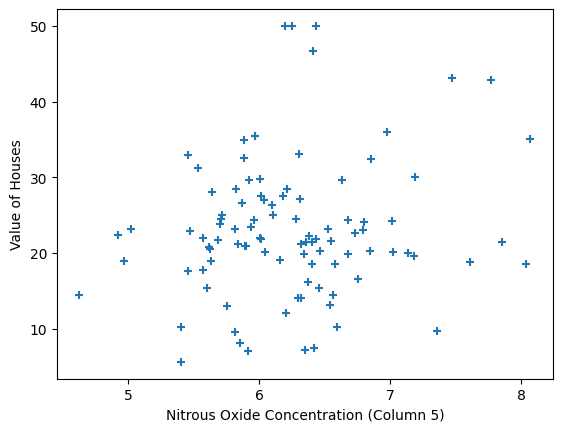

In [3]:
plt.scatter(x_train[0][:, datacol][1:num_houses], y_train[1][1:num_houses], marker = "+")
plt.rcParams["font.size"] = "18"
plt.xlabel("Nitrous Oxide Concentration (Column 5)")
plt.ylabel("Value of Houses")
plt.show()

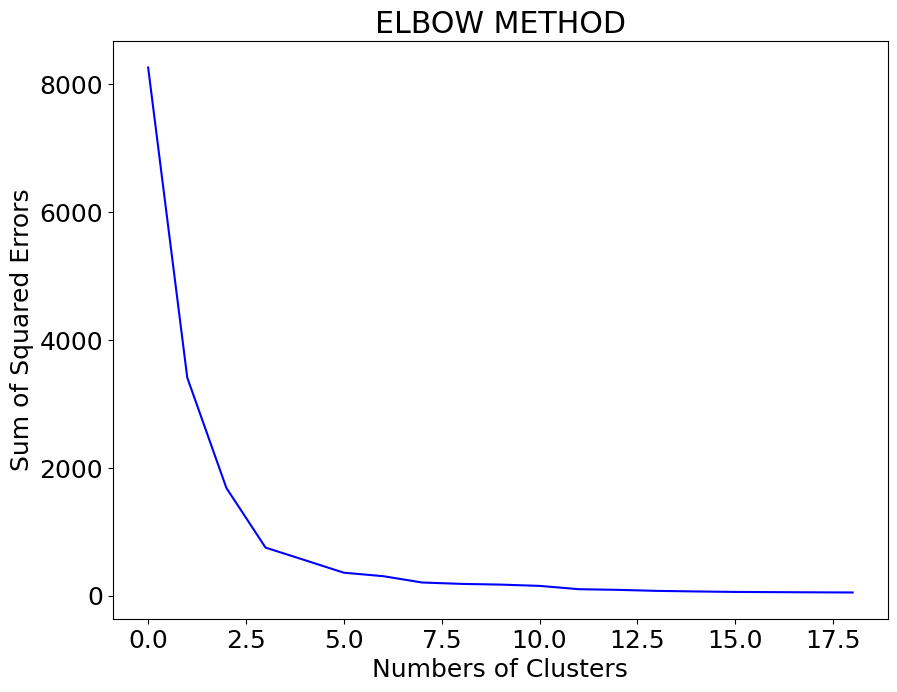

In [5]:
X = np.vstack((x_train[0][:, datacol][1:num_houses], y_train[1][1:num_houses])).T

import seaborn as sns
from sklearn.cluster import KMeans

elbow = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

# sns.lineplot(range(1, 20), elbow, color = "blue")
sns.lineplot(elbow, color = "blue", sizes = range(1, 21))

plt.rcParams.update({"figure.figsize": (10, 7.5), "figure.dpi": 100})
plt.title("ELBOW METHOD")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

number of estimated clusters: 6


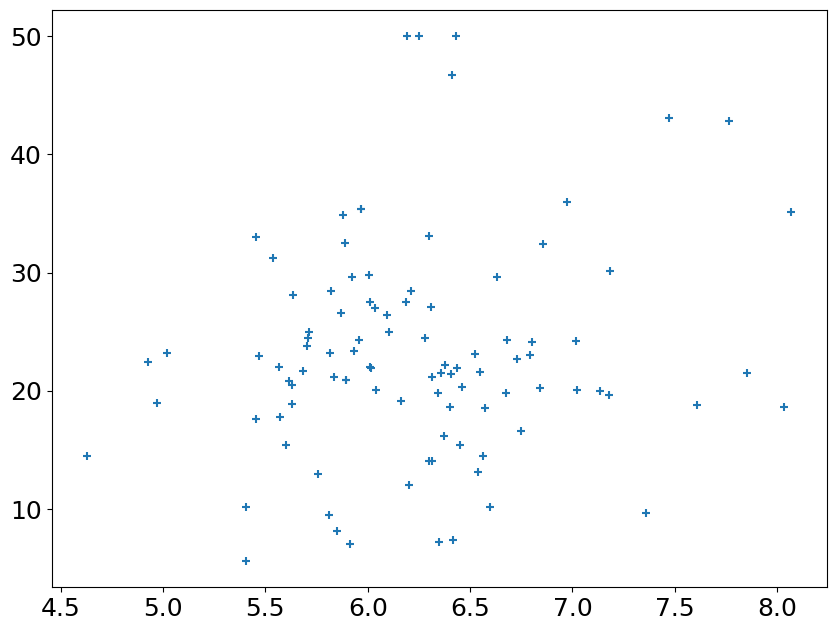

In [6]:
# program_8f.ipynb
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

plt.scatter(x_train[0][:, datacol][1:num_houses], y_train[1][1:num_houses], marker = "+")

# following bandwidth can be automatically detected using
# X = np.vstack((x_train[0][:, datacol][1:num_houses], y_train[1][1:num_houses])).T
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"number of estimated clusters: {n_clusters_}")

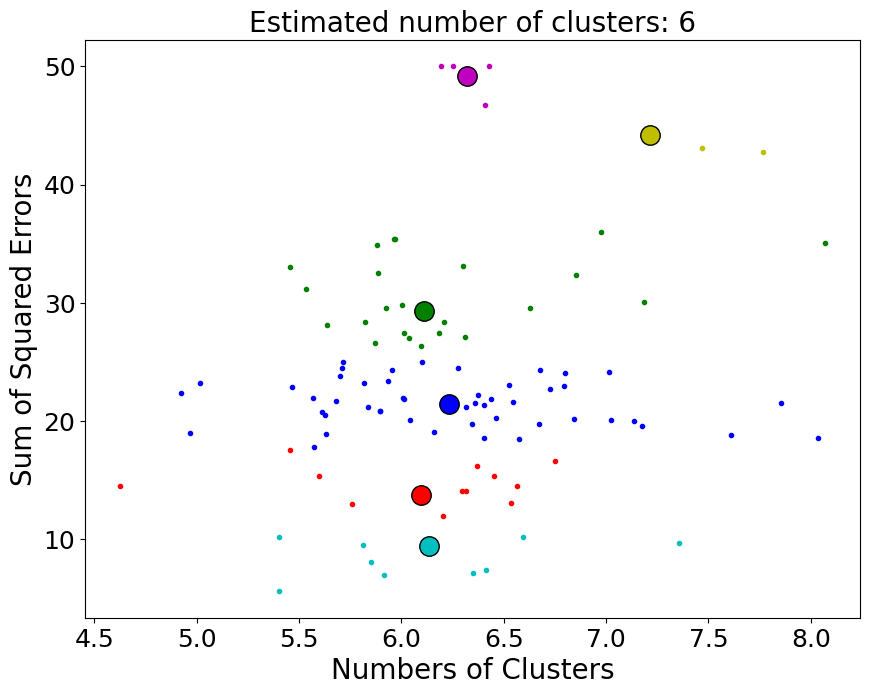

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor = col,
        markeredgecolor = "k",
        markersize = 14
    )
fs = 20
plt.title(f"Estimated number of clusters: {n_clusters_}", fontdict={"size": fs})
plt.xlabel("Numbers of Clusters", fontdict={"size": fs})
plt.ylabel("Sum of Squared Errors", fontsize = fs)
plt.show()


In [8]:
import matplotlib as mpl
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM


AttributeError: FancyArrowPatch.set() got an unexpected keyword argument 'arrow_style'

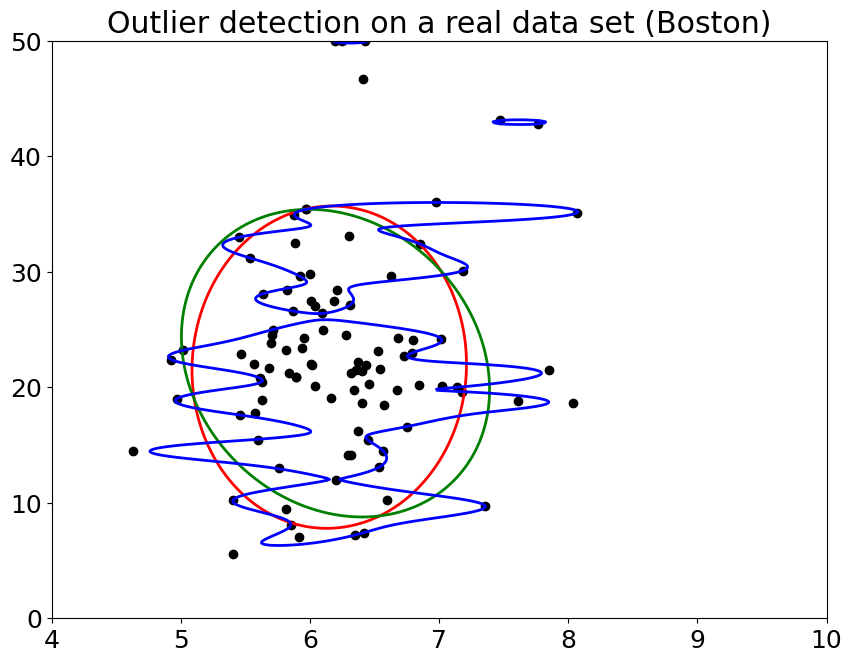

In [12]:
# define classifiers to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu = 0.25, gamma = 0.35)
}
colors = ["r", "g", "b"]
legend1 = {}
legend2 = {}

# get data
X1 = np.vstack((x_train[0][:, datacol][1:num_houses], y_train[1][1:num_houses])).T

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(4, 10, 500), np.linspace(0, 50, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(xx1, yy1, Z1, levels = [0], linewidths = 2, colors = colors[i]
                                )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (Boston)")
plt.scatter(X1[:, 0], X1[:, 1], color = "black")
bbox_args = dict(boxstyle = "round", fc = "0.8")
# arrow_args = dict(arrow_style = "->")
arrow_args = dict(arrow_style = "->")
plt.annotate(
    "outlying points",
    xy=(5, 2),
    xycoords="data",
    textcoords="data",
    xytext=(5, 2),
    arrowprops=arrow_args,
    bbox = bbox_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0],legend1_keys_list[1],legend1_keys_list[2]),
    loc = "upper left",
    prop = mpl.font_manager.FontProperties(size=11)
)
fs = 20
plt.title("Outlier detection on a real data set", fontsize = fs)
plt.xlabel("Attribute 5, Nitrous Oxide", fontsize = fs)
plt.ylabel("Mean Value", fontsize = fs)
plt.show()


In [13]:
# program_8h.ipynb: creating decision trees from a dataframe and predicting output. plotting confusion matrix.

import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz as gz
from sklearn import metrics

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["Species"] = data.target
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df["Species"] = df["Species"].replace(targets)


In [14]:
x = df.drop(columns="Species")
y = df["Species"]

feature_names = x.columns
labels = y.unique()

In [15]:
# creating training & testing data
from sklearn.model_selection import  train_test_split
X_train, test_x, Y_train, test_lab = train_test_split(x, y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, Y_train)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True, special_characters=True)

DTclf = clf.fit(X_train, Y_train)
prediction = DTclf.predict([[6, 4, 4, 0.4]])
print(f"Prediction for input [6, 4, 4, 0.4]: {prediction}")

graph = gz.Source(dot_data)

Prediction for input [6, 4, 4, 0.4]: ['versicolor']


c:\Users\eorlo\Desktop\mkt_notes_general\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


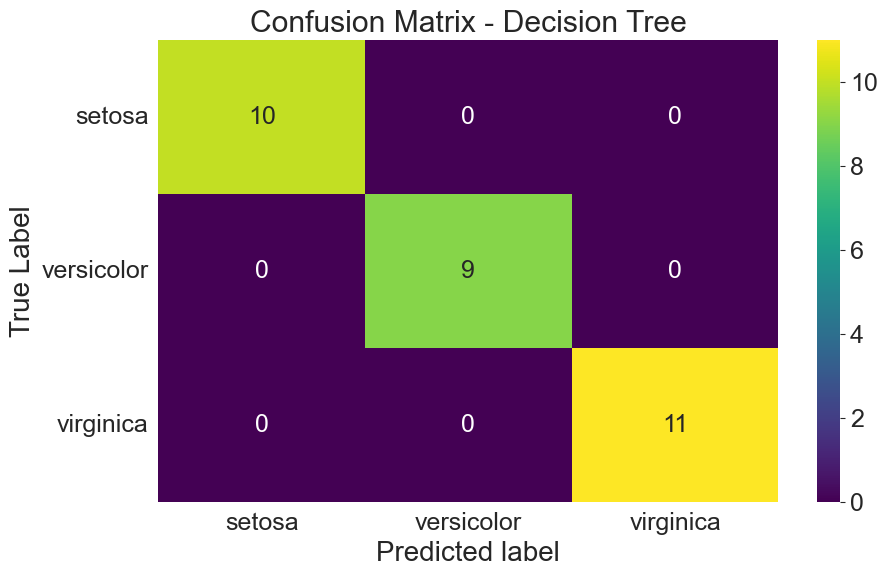

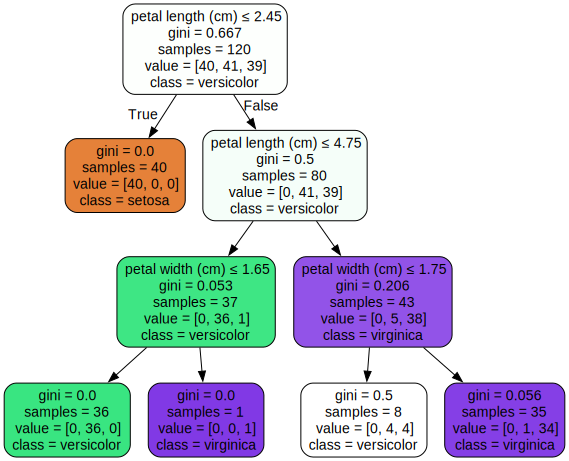

In [18]:
# Plot a confusion matrix
plt.figure(figsize=(10, 6))
test_pred_DT = clf.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_DT)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set_style(style = "whitegrid")
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted label", fontsize = 20)
ax.set_xticklabels([""] + labels)
ax.set_ylabel("True Label", fontsize = 20)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
graph